# 3-1 データ解析の基礎

## 3-1-3 Matplotlib

### 3-1-3-4 折れ線グラフ

In [1]:
import matplotlib.pyplot as plt
import pandas_datareader

%matplotlib inline

/Users/oka/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


#### pandas_datareader

In [2]:
# トヨタ自動車の銘柄コード
df = pandas_datareader.data.DataReader('7203.JP', 'stooq')

In [3]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-04-16,6592.0,6620.0,6561.0,6602.0,5686800
2020-04-15,6680.0,6750.0,6651.0,6738.0,5267200
2020-04-14,6535.0,6755.0,6535.0,6750.0,6716500
2020-04-13,6560.0,6636.0,6516.0,6525.0,4134600
2020-04-10,6580.0,6691.0,6551.0,6635.0,5919600


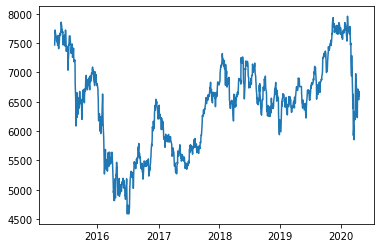

In [4]:
plt.plot(df['Open'])

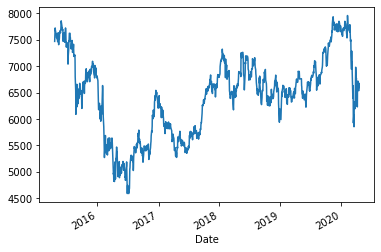

In [5]:
df['Open'].plot()

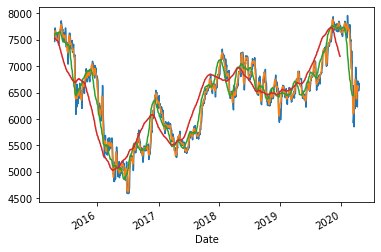

In [6]:
df['Open'].plot()
df['Open'].rolling(5).mean().plot() # 5日移動平均
df['Open'].rolling(25).mean().plot() # 25日移動平均
df['Open'].rolling(75).mean().plot() # 75日移動平均

### 3-1-3-5 Seaborn

In [7]:
import seaborn as sns

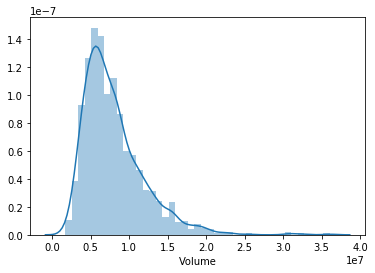

In [8]:
sns.distplot(df['Volume'])

## 3-2-1 scikit-learn

In [9]:
import sklearn

## 3-2-2 データセットの準備

In [10]:
from sklearn.datasets import load_breast_cancer
brest_cancer = load_breast_cancer()
type(brest_cancer)

sklearn.utils.Bunch

In [11]:
x = brest_cancer['data']
t = brest_cancer['target']

In [12]:
type(x), x.shape

(numpy.ndarray, (569, 30))

In [13]:
type(t), t.shape

(numpy.ndarray, (569,))

In [14]:
x[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [15]:
t[:3]

array([0, 0, 0])

In [16]:
len(t[t == 0]), len(t[t ==1])

(212, 357)

In [17]:
import numpy as np

# tが0の場合は1として、それ以外は0とする（現在悪性0、良性1で1がたくさん抽出されてしまうため）
t = np.where(t==0,1,0)
t[:3]

array([1, 1, 1])

(array([357.,   0., 212.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 3 Patch objects>)

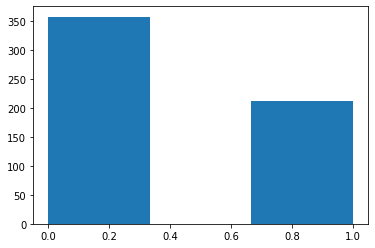

In [18]:
plt.hist(t, bins=3)

### 3-2-2-1 訓練データとテストデータ

In [19]:
from sklearn.model_selection import train_test_split

# テストが全体の20％となるようにランダムに分割
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.2, random_state=0)

In [20]:
x_train.shape, x_test.shape

((455, 30), (114, 30))

In [21]:
t_train.shape, t_test.shape

((455,), (114,))

## 3-2-3 モデルの訓練

In [22]:
# 決定木のアルゴリズムで分類問題に取り組む
from sklearn.tree import DecisionTreeClassifier

# モデルのインスタンス化
clf = DecisionTreeClassifier(random_state=0)

In [23]:
# 訓練データに元空いて、パラメータの訓練
clf.fit(x_train, t_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [24]:
# テストデータに対する予測値の計算
y_test = clf.predict(x_test)

## 3-2-4 モデルの検証

### 3-2-4-1 正解率

$\displaystyle Accuracy = \frac{TP+TN}{TP+FN+FP+TN}$

In [25]:
# テストデータに対する正解率の算出
clf.score(x_test, t_test)

0.9122807017543859

In [26]:
# 訓練データに対する正解率の算出
clf.score(x_train, t_train)

1.0

### 3-2-4-2 混合行列

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
matrix = confusion_matrix(t_test, y_test)
matrix

array([[60,  7],
       [ 3, 44]])

In [29]:
import seaborn as sns

Text(33.0, 0.5, 'Target')

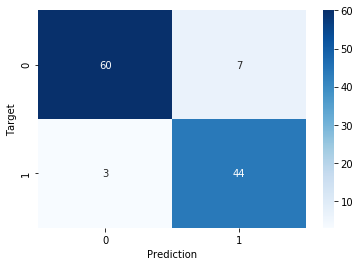

In [30]:
sns.heatmap(matrix, annot=True, cmap='Blues');
plt.xlabel('Prediction')
plt.ylabel('Target')

### 3-2-4-3 適合率

適合率：予測値がpositiveと判定された中でどの程度が正解していたかを算出する式  

$\displaystyle Precision = \frac{TP}{TP+FP}$

In [31]:
from sklearn.metrics import precision_score

In [32]:
precision_score(t_test, y_test)

0.8627450980392157

### 3-2-4-4 再現率

教師データがPositiveであるサンプルに対してどの程度正解していたかを表す式  

$\displaystyle Recall = \frac{TP}{TP+FN}$

In [33]:
from sklearn.metrics import recall_score

In [34]:
recall_score(t_test, y_test)

0.9361702127659575

### 3-2-4-5 F値

適合率と再現率の調和平均を取る  

$\displaystyle F1score = \frac{2(Prediction×Recall)}{Prediction+Recall}$

In [35]:
from sklearn.metrics import f1_score
f1_score(t_test, y_test)

0.8979591836734694

## 3-2-5 再現性を高めるための工夫

In [36]:
# データの内容を確認
len(t[t==0]),len(t[t==1])

(357, 212)

### 3ｰ2ｰ5ｰ1 重み付け

サンプル数が少ないデータを大きく評価する方法

In [37]:
weight = {
    0: len(t) / len(t[t==0]),
    1: len(t) / len(t[t==1])
}
weight

{0: 1.5938375350140057, 1: 2.6839622641509435}

In [38]:
# モデルのインスタンス化
# class_weightで重み付け
clf = DecisionTreeClassifier(random_state=0, class_weight=weight)
# モデルの訓練
clf.fit(x_train, t_train)

DecisionTreeClassifier(ccp_alpha=0.0,
                       class_weight={0: 1.5938375350140057,
                                     1: 2.6839622641509435},
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

In [39]:
# 正解率
clf.score(x_test, t_test)

0.9210526315789473

In [40]:
# テストデータを使った予測値の計算
y_test = clf.predict(x_test)

In [41]:
# 適合率と再現率で検証
precision_score(t_test, y_test), recall_score(t_test, y_test)

(0.88, 0.9361702127659575)

### 3-2-5-2 ハイパーパラメータのチューニング

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
# ハイパーパラメータの候補を列挙
params = {
    'max_depth':list(range(2,10)),
    'criterion':['gini','entropy']    
}

# scoringは指定しない場合Accuracy
# cvは交差検証の分割数
clf_grid = GridSearchCV(
    estimator=DecisionTreeClassifier(class_weight=weight, random_state=0),
    scoring='recall',
    param_grid=params,
    cv=5,
)

In [44]:
# すべてのハイパーパラメータの候補で訓練
clf_grid.fit(x_train, t_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight={0: 1.5938375350140057,
                                                            1: 2.6839622641509435},
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='depre

In [45]:
# 最も良かったハイパーパラメータの組み合わせ
clf_grid.best_params_

{'criterion': 'entropy', 'max_depth': 2}

In [46]:
# モデルにパラメーターチューニングの結果を反映
clf = clf_grid.best_estimator_
clf.fit(x_train, t_train)

DecisionTreeClassifier(ccp_alpha=0.0,
                       class_weight={0: 1.5938375350140057,
                                     1: 2.6839622641509435},
                       criterion='entropy', max_depth=2, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

In [47]:
clf.score(x_test, t_test)

0.9210526315789473

In [48]:
# 予測値の計算
y_test = clf.predict(x_test)

In [49]:
# 適合率、再現値、F値
precision_score(t_test, y_test), recall_score(t_test, y_test), f1_score(t_test, y_test)

(0.8392857142857143, 1.0, 0.9126213592233009)

Text(33.0, 0.5, 'Target')

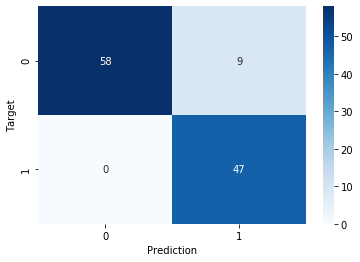

In [50]:
# 混合行列
matrix = confusion_matrix(t_test, y_test)

sns.heatmap(matrix, annot=True, cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Target')

## 3-3-1 icrawler

In [51]:
from icrawler.builtin import BingImageCrawler

In [52]:
%pwd

'/Users/oka/Desktop/Learning/ML/A_Guide_to_Leveraging_ML'

In [53]:
crawler = BingImageCrawler(storage={'root_dir':'crawler'})

In [54]:
crawler.crawl(keyword='犬',max_num=10)

2020-04-17 13:56:13,131 - INFO - icrawler.crawler - start crawling...
2020-04-17 13:56:13,132 - INFO - icrawler.crawler - starting 1 feeder threads...
2020-04-17 13:56:13,133 - INFO - feeder - thread feeder-001 exit
2020-04-17 13:56:13,133 - INFO - icrawler.crawler - starting 1 parser threads...
2020-04-17 13:56:13,135 - INFO - icrawler.crawler - starting 1 downloader threads...
2020-04-17 13:56:13,450 - INFO - parser - parsing result page https://www.bing.com/images/async?q=犬&first=0
2020-04-17 13:56:13,469 - INFO - downloader - skip downloading file 000001.jpg
2020-04-17 13:56:13,470 - INFO - downloader - skip downloading file 000002.jpg
2020-04-17 13:56:13,471 - INFO - downloader - skip downloading file 000003.jpg
2020-04-17 13:56:13,472 - INFO - downloader - skip downloading file 000004.jpg
2020-04-17 13:56:13,473 - INFO - downloader - skip downloading file 000005.jpg
2020-04-17 13:56:13,473 - INFO - downloader - skip downloading file 000006.jpg
2020-04-17 13:56:13,474 - INFO - dow

## 3-3-2 Selenium

In [55]:
import selenium

In [56]:
from selenium import webdriver

In [57]:
# ブラウザ立ち上げ
browser = webdriver.Chrome()

2020-04-17 13:56:14,483 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2020-04-17 13:56:14,486 - INFO - parser - thread parser-001 exit


WebDriverException: Message: Service chromedriver unexpectedly exited. Status code was: -9


In [ ]:
url = 'https://sandobox.kikagaku.co.jp/test_scraping'
browser.get(url)